In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['HYQuanTangShiJ']
import mplfinance as mpf
%matplotlib inline

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <p class="display-1 h1"><font face="Source Han Serif CN SemiBold">能源金融与量化交易<font></p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 能源金融

<dl class="row text-info">
    <dt class="col-md-4">能源金融</dt>
    <dd class="col-md-8">通过能源资源与金融资源的整合，实现能源产业资本与金融资本不断优化聚合，从而促进能源产业与金融产业良性互动、协调发展的一系列金融活动</dd>
<dl>

## 能源行业的发展与风险

- 十六届五中全会
> 能源产业，要强化节约和高效利用的政策导向，坚持节约优先、立足国内、煤为基础、多元发展，构筑稳定、经济、清洁的能源供应体系。**建设大型煤炭基地**，调整改造中小煤矿，开发利用煤层气，鼓励**煤电联营**。以大型高效机组为重点优化发展煤电，在保护生态基础上有序开发水电，积极发展核电，**加强电网建设，扩大西电东送规模**。实行油气并举，加强国内石油天然气勘探开发，**扩大境外合作开发**，增强石油战略储备能力，稳步发展石油替代产品。加快发展风能、太阳能、生物质能等可再生能源。

- KPMG发布的《采矿业的风险与机遇》

<center><img src="./img/introduction/energyRisk.png" width=100%></center>

## 金融

### 金融是什么？

- **风险管理工具**

<blockquote class="blockquote">
    <p>个人、企业和政府部门都可以到金融体系中来<b>转移自己不想承担的风险</b>，或者<b>承担自己愿意且有能力承担的风险</b>，使得金融体系客观上成为经济体系的风险集散地，成为经济体系应对各类风险因素和不确定性的枢纽系统。</p>
    <footer class="blockquote-footer">金融风险管理视角下的金融对外开放,《金融研究》2020,(1)</footer>
</blockquote>

### 金融如何实现风险管理？

<dl class="row text-danger">
    <dt class="col-md-4">金融工具</dt>
    <dd class="col-md-8">在金融市场中可交易的金融资产</dd>
<dl>

- 股票、期货、外汇等

- 通过对金融工具的**交易**实现风险管理

- 能源企业通过买卖及保有资产，以资产**收购价**与**卖出时的市场价**间的**差值**来获取收益或规避损失

- 方法
    - 投机（speculating）
    - 套期保值（hedging）
    - 做市（market making）

### 期货市场及期货

<dl class="row text-info">
    <dt class="col-md-2">期货合约</dt>
    <dd class="col-md-10">由期货交易场所统一制定的、规定在将来某一<strong>特定的时间</strong>和<strong>地点</strong>交割一定数量标的物的<strong>标准化合约</strong>。</dd>
</dl>

#### 期货的特点

- 标准化合约
- 双向交易
- 杠杆机制
- 每日无负债结算制度 

##### 标准化合约

[动力煤期货合约](http://www.czce.com.cn/cn/sspz/dlm/H770212index_1.htm)

- 交易单位：买入或卖出的数量必须是交易单位的**整数倍**

- 最小变动价位：期货交易时买卖双方报价所允许的最小变动幅度，每次报价时的价格变动必须时该最小变动价位的**整数倍**

##### 双向交易

- 既可以**买入**开仓，也可以**卖出**开仓

- 可以实现对冲（hedge）策略

##### 杠杆机制

<dl class="row text-danger">
    <dt class="col-md-3">交易保证金</dt>
    <dd class="col-md-9">
        <p>交易双方向交易所缴纳的、用于履约担保的资金。</p>
        <p>一般是合约金额的5% ∼ 10%。</p>
    </dd>
</dl>

- 例如，买（卖）1手动力煤期货合约，交易单位100吨/手，报价650元/吨，保证金是10%

In [5]:
650*100*0.1

6500.0

- 以少量的资金控制期货合约，实现以小博大

##### 每日无负债结算

- 每日收盘后，会员的保证金账户会依据持仓合约数量和期货合约的结算价进行调整，以反映该会员的盈利或亏损

- 也被称作“逐日盯市”（marked-to-market）

<center>

比较项目|股票|期货
:---:|:---:|:---:
操作方向|做多|做多+**做空**
总利益|非零和博弈|**零和**博弈
风险|有风险|高风险
    
</center>

### 我国主要期货期权交易所

<center><img src="./img/tradingBasics/exchange.png" width=60%></center>

- 交易时间
    - 上午：9:00$\sim$11:30 (股指期货9:30$\sim$11:30,国债期货9:15$\sim$11:30)
    - 下午：13:30$\sim$15:00（股指期货13:00$\sim$15:00,国债期货13:00$\sim$15:15）
    - 晚上: 21:00$\sim$23:00（铜、铝、铅、锌、镍、锡21:00$\sim$01:00，黄金、白银21:00$\sim$02:30）

# 什么是量化交易？

## 量化交易的定义

<dl class="row text-info">
    <dt class="col-md-4">量化</dt>
    <dd class="col-md-8">将抽象的逻辑关系用<strong>数学方式</strong>表达出来</dd>
<dl>

<dl class="row text-danger">
    <dt class="col-md-4"><span class="text-muted">(金融)</span>交易</dt>
    <dd class="col-md-8">根据投资决策创立或者改变投资组合头寸的证券交易</dd>
<dl>

- 头寸(position)：持有的特定商品、证券、货币等的数量

<dl class="row">
    <dt class="col-md-4">量化交易(Quantatitive Trading)</dt>
    <dd class="col-md-8">运用数学模型(统计学、机器学习等)对历史数据进行量化分析以开发交易策略，利用计算机按照交易策略执行交易决策</dd>
<dl>

- 数学模型：统计模型(回归模型、时间序列分析等)、机器学习(分类模型、聚类模型、文本挖掘等)

- 计算机技术：编程语言(Python、C++等)、数据存储技术(mysql、MongoDB、hdf5等)

## 主观交易

<dl class="row">
    <dt class="col-md-4">主观交易</dt>
    <dd class="col-md-8">投资者利用主观判断做出投资决策</dd>
<dl>

### 主观判断从哪儿来？

- 历史K线图

In [33]:
stockdf = web.DataReader('600519.SS','yahoo',start='2019-1-1',end='2020-11-11')
stockdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,612.000000,595.010010,609.979980,598.979980,6228649.0,583.424377
2019-01-03,601.659973,585.799988,599.969971,590.000000,3097735.0,574.677612
2019-01-04,607.669983,582.020020,587.280029,602.000000,3768347.0,586.366028
2019-01-07,610.299988,602.219971,587.280029,605.489990,3475013.0,589.765381
2019-01-08,612.000000,600.280029,605.500000,604.789978,2883813.0,589.083496
...,...,...,...,...,...,...
2020-11-04,1704.000000,1685.000000,1700.000000,1699.579956,1644371.0,1699.579956
2020-11-05,1732.479980,1712.099976,1717.000000,1721.900024,2352414.0,1721.900024
2020-11-06,1731.589966,1690.000000,1730.550049,1700.619995,2305153.0,1700.619995


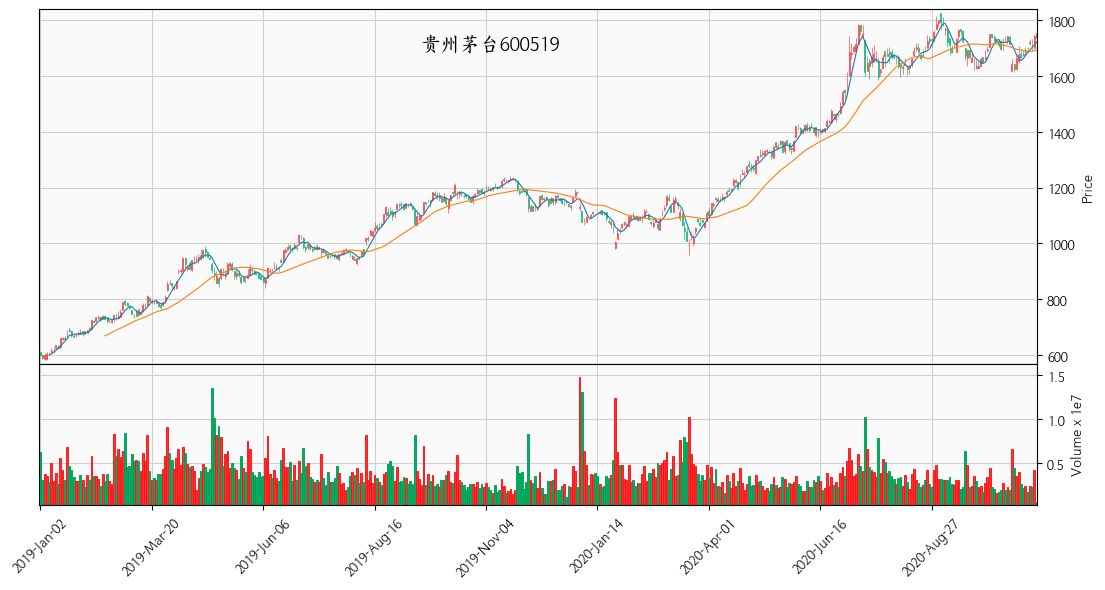

In [43]:
mc = mpf.make_marketcolors(up='#fe3032', down='#00b060', inherit=True)
sty = mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc,rc={'font.family':'HYQuanTangShiJ'})
mpf.plot(stockdf,type='candle',style=sty,volume=True,figratio=(12,6),figscale=1,title='贵州茅台600519',tight_layout=True,mav=(5,30))

### 主观判断从哪儿来？<span class="text-muted">(续)</span>

- 国际环境、财经新闻

<center><img src="./img/introduction/news.jpg" width=100%></center>

- 券商的研究报告

<center>
    <div class="row">
        <div class="col-md-6">
            <img src="./img/introduction/instRep20190.jpg" width=100%>
        </div>
        <div class="col-md-6">
            <img src="./img/introduction/instRep2019.jpg" width=100%>
        </div>
    </div>
</center>

- 公司的财务报告

<center><img src="./img/introduction/financialReport.jpg" width=100%></center>

### 主观判断从哪儿来？<span class="text-muted">(续)</span>

- 著名人物的演讲

<center><img src="./img/introduction/people.jpg" width=100%></center>

- 论坛、朋友圈等社交媒体

<center><img src="./img/introduction/snowBall.png" width=50%></center>

- 小道消息

<center><img src="./img/introduction/rumor.png" width=100%></center>

### 交易员

<dl class="row">
    <dt class="col-md-4">交易员(trader)</dt>
    <dd class="col-md-8">
        <p>在金融市场从事金融资产买卖的个体</p>
        <p>可以代表自己、他人，或者机构交易</p>
    </dd>
<dl>

- 交易员应当具有的素质
     - 果断
     - 谨慎
     - 耐得住寂寞
     - 能够一定程度上克服人类固有的有限理性(bounded rationality)

##### 典型的有限理性

###### 前景理论(prospect theory)

<center><img src="./img/introduction/prospecttest.jpeg" width=100%></center>

<center><img src="./img/introduction/prospect-theory.jpg" width=100%></center>

- 大多数人在面临**获利**的时候是风险**规避**的

- 大多数人在面临**损失**的时候是风险**偏好**的

- 大多数人在损失的时候比盈利的时候更愿意承受风险，愿意承受较长时间的损失和较短时间的盈利

###### 过度自信(overconfidence)

<center><img src="./img/introduction/overconfidence.png" width=40%></center>

- 高估自己的技术、能力，认为真实的自己比现在的自己要好

- 表现
    - 高于平均水平(better than average)
    - 一切尽在掌控(illusion of control)
    - 乐观的时间估计(timing optimism)：高估自己能在限定时间内完成任务，却低估任务需要花费的真实时间
    - 需求效应(desirability effect)：高估自己希望发生的结果的出现概率

###### 代表性法则(representativeness heuristic)

<center><img src="./img/introduction/represent.png" width=100%></center>

- 基于面对的情况与我们头脑中的原型(prototype)之间的相似程度做出决策

###### 锚定效应(anchoring effects)

<center><img src="./img/introduction/anchoring.jfif" width=50%></center>

- 当需要对某个事件做定量估计时，会将某些**特定数值**作为起始值，起始值像锚一样**制约**着估计值。在做决策的时候，会不自觉地给予**最初**获得的信息过多的重视

## 量化交易的特点

- 方法科学，建立在数学模型与大规模数据回测实验基础之上

- 纪律性强，剔除人为不稳定因素

- 响应迅速，计算机执行可以达到纳秒级别，而大脑判断到手指敲在键盘的反应时间是几百毫秒

- 自动化连续交易

## 量化交易研究假设

- 交易策略，<span class="text-danger"><strong>量化交易的核心</strong></span>
    - 被动交易策略 v.s. 主动交易策略：市场有效假说是否成立

<center><img src="./img/introduction/hs300.png" width=80%></center>

##### 有效市场假说

- 有效市场假说（efficient market hypothesis）在1965年由尤金·法玛（Eugene Fama，美国芝加哥大学教授）提出

<center><img src="./img/introduction/fama1.jpg" width=20%></center>
<p class="text text-danger h3">the father of modern finance</p>

> 股票价格反映了所有的信息，因此，从长期来看投资者**不能**获得超过一般水平的回报

- 股票价格总是按照公允价值在交易
- 投资者**不能**发现低估或者高估的股票
- 不能通过**选股**或者**择时**获取超额回报
- 技术分析和基本面分析都是无效的

> 把一只猴子的眼睛蒙起来，让它通过乱扔飞镖去选股票，其回报都能和基金经理差不多

<center><img src="./img/introduction/emh.jpg" width=50%></center>

## 量化交易的发展现状

<center><img src="./img/introduction/quantNow.png" width=100%></center>